# Breast Cancer Detection

## Dataset Description
Source : https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Dataset Description : Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image. A few of the images can be found at http://www.cs.wisc.edu/~street/images/

The number of instances present in the model are 569, with 32 attributes.



## Attribute Information
ID number
Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

    1) radius (mean of distances from center to points on the perimeter)
	2) texture (standard deviation of gray-scale values)
	3) perimeter
	4) area
	5) smoothness (local variation in radius lengths)
	6) compactness (perimeter^2 / area - 1.0)
	7) concavity (severity of concave portions of the contour)
	8) concave points (number of concave portions of the contour)
	9) symmetry 
	10)fractal dimension ("coastline approximation" - 1)


## Task
Predict the type of breast cancer

### EDA and Pre-Processing

In this section of our notebook, we perform some exploratory data analysis on our dataframe to get a general idea of what our dataframe consists of and to manipulate it if required.

In [1]:
#importing libraries


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the dataset


df = pd.read_csv("data.csv")
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
#Let us get some basic insight on our columns
#and understand their properties and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#We will drop the column "Unnamed: 32", because it has 0 non-null values.
#Also, we can see that no other attributes have any missing values


df.drop(['Unnamed: 32'], axis=1, inplace=True)
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [7]:
#We will also need to convert our categorical coumns, into numerical by using
#hot encoding on the dataset


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler



for column in df.columns:
  if df[column].dtype == np.int64 or df[column].dtype == np.float64:
    continue
  df[column] = LabelEncoder().fit_transform(df[column])


df.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

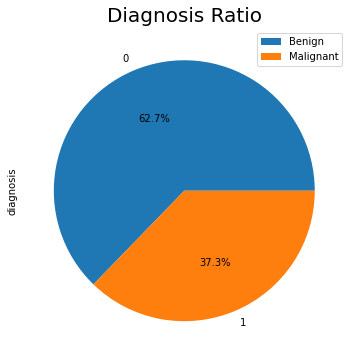

In [8]:
#Let's check the ratio of Benign to Malignant cancer


plt.figure(figsize=(13,6))
df.diagnosis.value_counts().plot.pie(autopct="%.1f%%")
plt.title("Diagnosis Ratio", fontsize = 20)
plt.legend(['Benign','Malignant'])

From the above pie chart, we can see that 62.7% of our entries have Benign Type Cancer and 37.3% have Malignant Cancer. We will also have to balance this data later in the project

<AxesSubplot:>

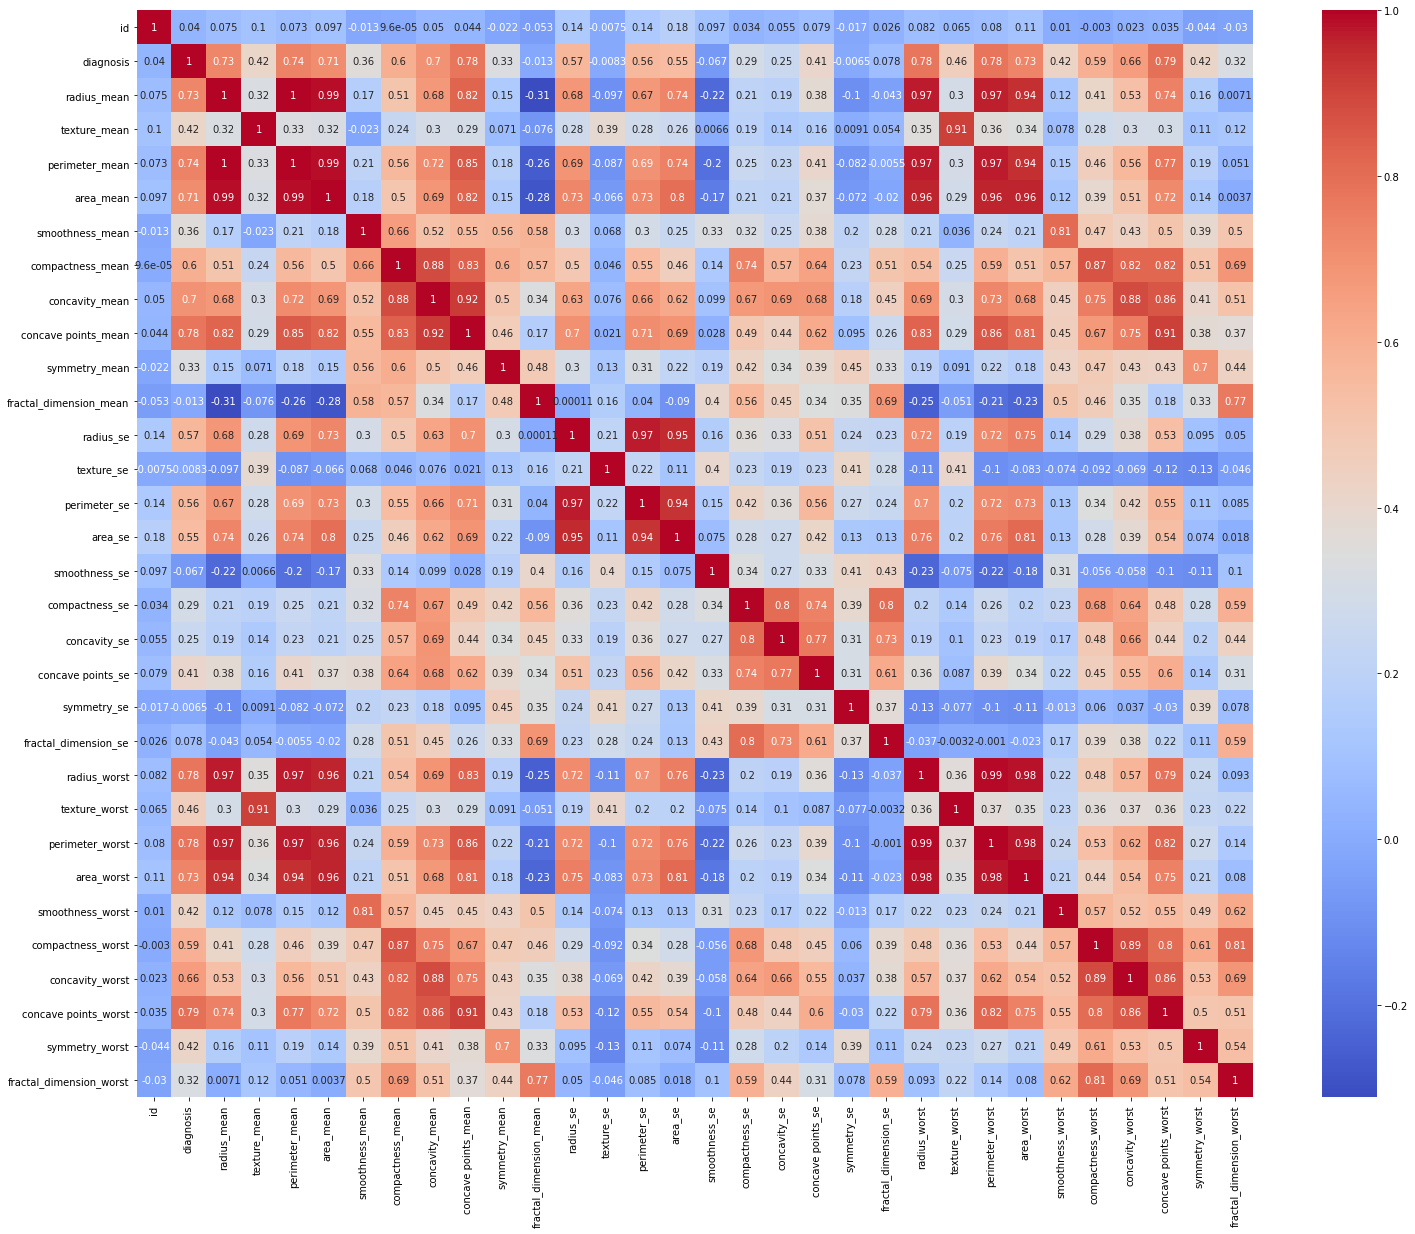

In [9]:
#A heatmap is used to graphically represent the correlation between the attibutes in our dataset
#We will plot a heatmap to check for the highly correlated columns

plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

In [10]:
#There are many attributes with correalation under less than 0.5.
#Let us do further analysis on these columns


high_corr_data = df.corr()
high_corr_columns = high_corr_data.index[abs(high_corr_data['diagnosis'])>=0.5]
high_corr_columns

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'radius_worst',
       'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

<AxesSubplot:>

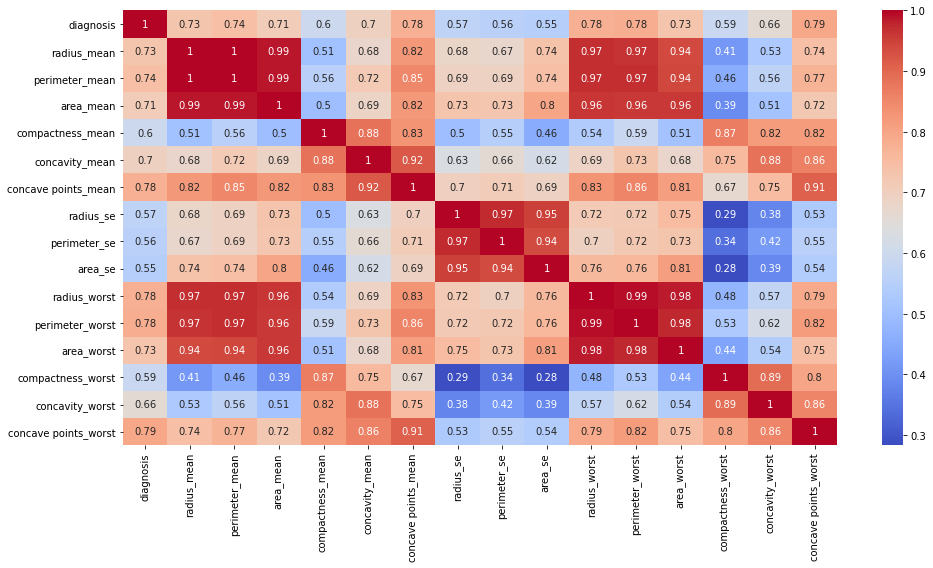

In [11]:
#Plotting a heatmap of these high correlated values

plt.figure(figsize=(16,8))
sns.heatmap(df[high_corr_columns].corr(), annot=True, cmap="coolwarm")

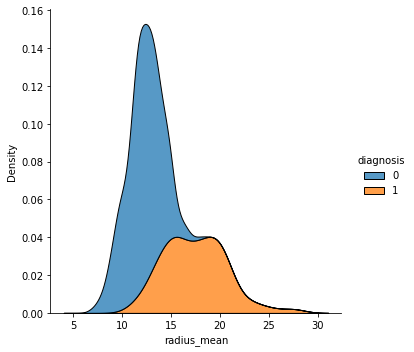

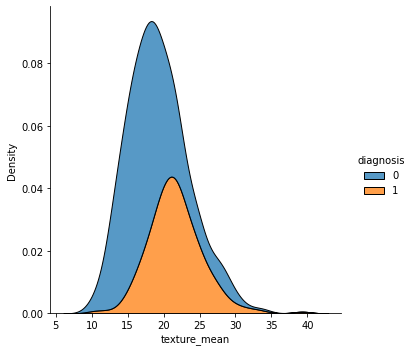

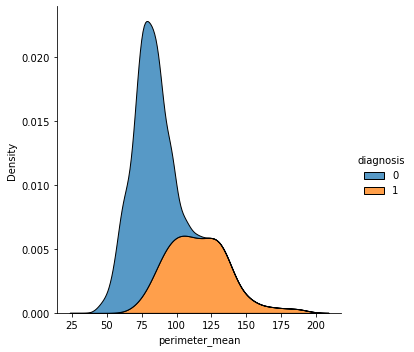

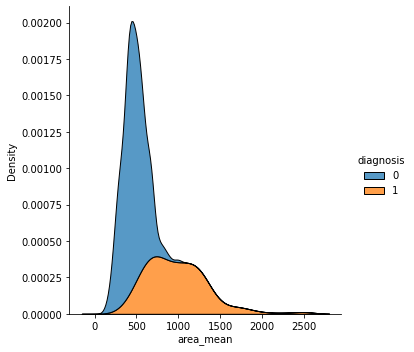

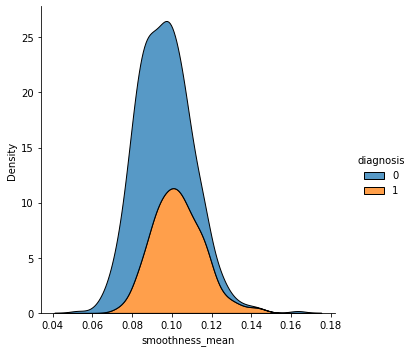

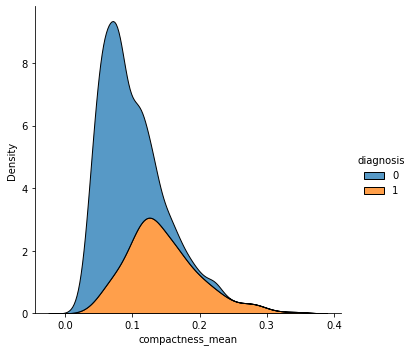

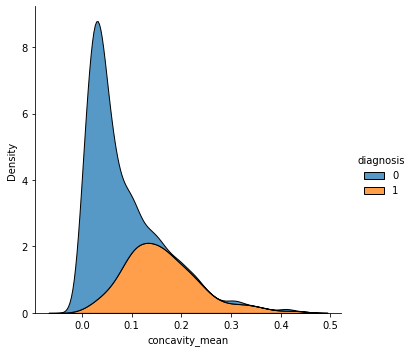

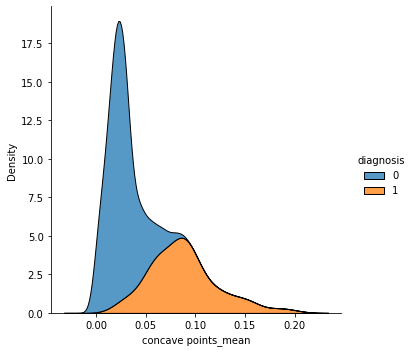

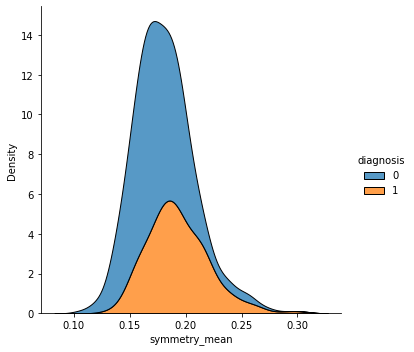

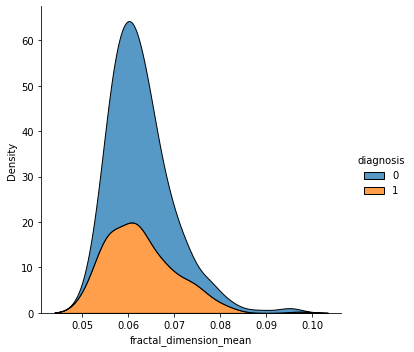

In [12]:
#Let us check the difference between the means values of attributes of the two types of cancer

mean_col = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

for col in mean_col:
    sns.displot(df, x=col, hue="diagnosis", kind="kde", multiple="stack")

### Model Selection and Scaling of dataset

In [13]:
#importing libraries


from sklearn.model_selection import train_test_split 

1    212
0    212
Name: diagnosis, dtype: int64


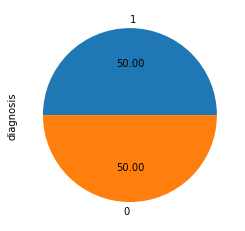

In [14]:
#Splitting dependent and independent columns
x = df.drop(columns = 'diagnosis')
y = df['diagnosis']

from imblearn.under_sampling import RandomUnderSampler

random_under_sampler = RandomUnderSampler(sampling_strategy = 1)

X_res, y_res = random_under_sampler.fit_resample(x,y)

y_res.value_counts().plot.pie(autopct = "%.2f")

print(y_res.value_counts())

In [15]:
#Splitting data into training and test sets

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

Now that we have sampled our data and performed our basic analysism we will move on to testing our dataset for best the model

In [16]:
#Let us first import the model from the sklearn module


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score

confusionmatrix = confusion_matrix(y_test, predictions)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusionmatrix.shape[0]):
    for j in range(confusionmatrix.shape[1]):
        ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

#### Testing for Logistic Regression

In [17]:
model_logistic = LogisticRegression()
model_logistic.fit(x_train, y_train)
print('Logistic regression accuracy: {:.4f}'.format(accuracy_score(y_test, model_logistic.predict(x_test))))

Logistic regression accuracy: 0.5877


Text(0.5, 1.0, 'Confusion Matrix')

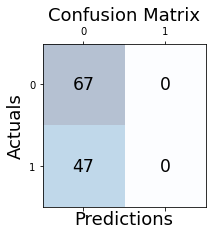

In [25]:
confusionmatrix = confusion_matrix(y_test, model_logistic.predict(x_test))

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusionmatrix.shape[0]):
    for j in range(confusionmatrix.shape[1]):
        ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

#### Testing for Random Forest Classifier

In [18]:
model_randomforest = RandomForestClassifier()
model_randomforest.fit(x_train, y_train)
print('Random Forest accuracy: {:.4f}'.format(accuracy_score(y_test, model_randomforest.predict(x_test))))

Random Forest accuracy: 0.9561


Text(0.5, 1.0, 'Confusion Matrix')

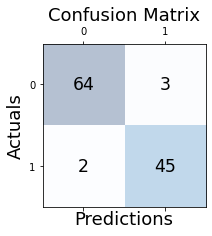

In [27]:
confusionmatrix = confusion_matrix(y_test, model_randomforest.predict(x_test))

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusionmatrix.shape[0]):
    for j in range(confusionmatrix.shape[1]):
        ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

#### Testing for K Neighbours Classifier

In [19]:
model_knnclassfier = KNeighborsClassifier()
model_knnclassfier.fit(x_train, y_train)
print('Random Forest accuracy: {:.4f}'.format(accuracy_score(y_test, model_knnclassfier.predict(x_test))))

Random Forest accuracy: 0.7368


Text(0.5, 1.0, 'Confusion Matrix')

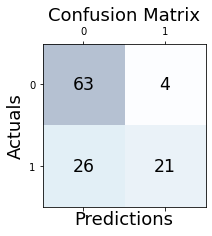

In [28]:
confusionmatrix = confusion_matrix(y_test, model_knnclassfier.predict(x_test))

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusionmatrix.shape[0]):
    for j in range(confusionmatrix.shape[1]):
        ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

#### Testing for XGBoostClassifier

In [29]:
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)
print('XGBoostClassifier accuracy: {:.4f}'.format(accuracy_score(y_test, model_xgb.predict(x_test))))

XGBoostClassifier accuracy: 0.9825


Text(0.5, 1.0, 'Confusion Matrix')

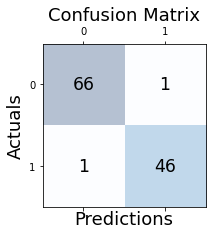

In [30]:
confusionmatrix = confusion_matrix(y_test, model_xgb.predict(x_test))

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusionmatrix.shape[0]):
    for j in range(confusionmatrix.shape[1]):
        ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

#### Testing for SVM

In [22]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
print('SVM accuracy: {:.4f}'.format(accuracy_score(y_test, model_svm.predict(x_test))))

SVM accuracy: 0.5877


Text(0.5, 1.0, 'Confusion Matrix')

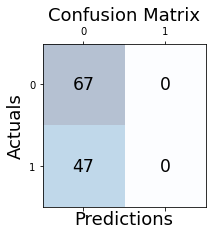

In [31]:
confusionmatrix = confusion_matrix(y_test, model_svm.predict(x_test))

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusionmatrix.shape[0]):
    for j in range(confusionmatrix.shape[1]):
        ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

In our model seletion analysis we can see that the XGBoostClassifier Model has the maximum score of 98.25% accuracy. Let us furhter analyse this model before confirming our predictions.

#### XGBoostClassifier

In [33]:
print(classification_report(y_test, model_xgb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        47

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [35]:
predictedvalues= pd.DataFrame({'Actual': y_test, 'Predicted': model_xgb.predict(x_test)})
predictedvalues.to_csv("final_predictions.csv", index=False)
predictedvalues

Actual  Predicted
512       1          1
457       0          0
439       0          0
298       0          0
37        0          0
..      ...        ...
213       1          1
519       0          0
432       1          1
516       1          1
500       0          0

[114 rows x 2 columns]